In [225]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Part 1 Read and Process Data

In [226]:
# Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [227]:
# read data
Fraud = pd.read_csv('Fraud_Data.csv')
IP = pd.read_csv('IpAddress_to_Country.csv')

In [228]:
# Check data types
Fraud.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [229]:
# check if IP address is unique
Fraud[Fraud.duplicated(['ip_address'], keep=False)]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1
77,392706,2015-01-07 08:15:53,2015-01-07 08:15:54,65,VRYLIRAQJIIIE,SEO,Opera,F,30,1.213105e+09,1
83,67592,2015-01-10 23:23:25,2015-01-10 23:23:26,38,ITUMJCKWEYNDD,Ads,Safari,M,43,3.874758e+09,1
111,352206,2015-01-06 21:48:13,2015-01-06 21:48:14,45,FRITFBEXOSJEI,Ads,IE,F,22,1.367518e+09,1
134,104061,2015-01-05 00:09:57,2015-01-05 00:09:58,23,XSEQHFFOYFICY,SEO,IE,M,33,2.011989e+09,1
141,348260,2015-01-10 17:13:50,2015-01-10 17:13:51,18,VOQAAYLLJLUII,SEO,Safari,M,27,7.989386e+08,1
160,121703,2015-01-06 08:56:42,2015-01-06 08:56:43,28,XAVNTONBKCVJS,Direct,Safari,M,34,2.890012e+09,1


In [230]:
# check if data contain missing value
Fraud.isnull().values.any()

False

In [231]:
# create a dictionary to store ip address, use the range of lower and upper bond as the key
IP['IpRange'] = list(zip(IP['lower_bound_ip_address'], IP['upper_bound_ip_address']))
del IP['lower_bound_ip_address']
del IP['upper_bound_ip_address']
IpDic = IP.set_index('IpRange').to_dict().get('country')

In [232]:
# extract a sample to write code first
Fraud = Fraud.sample(1000).reset_index()

In [233]:
len(Fraud)

1000

In [234]:
# Method to locate the key by a value for lambad 
def get_rate_apply(ip):
    for key in IpDic.keys():
        if key[0] <= ip: 
            if ip <= key[1]:
                return IpDic[key]

In [235]:
# Locate users by IP
Fraud['country'] = 'Others'

# Method 1
# Fraud['country'] = Fraud['ip_address'].apply(lambda ip: get_rate_apply(ip))

# Method 2
for index, ip in enumerate(Fraud['ip_address']):
    Fraud['country'][index] = get_rate(IpDic, ip)

In [236]:
# Store output
writer = pd.ExcelWriter('IPCombine.xlsx')
Fraud.to_excel(writer,'Sheet1')
writer.save()

In [237]:
Fraud['country']

0           United States
1                 Germany
2                 Belgium
3                  Mexico
4                   China
5           United States
6      Russian Federation
7                    None
8           United States
9                  Brazil
10            New Zealand
11                   None
12          United States
13     Russian Federation
14                  Japan
15                Austria
16          United States
17          United States
18          United States
19          United States
20                   None
21                Ukraine
22          United States
23                   None
24          United States
25                Germany
26          United States
27          United States
28            Netherlands
29          United States
              ...        
970                  None
971        United Kingdom
972         United States
973         United States
974        United Kingdom
975         United States
976         United States
977         

In [238]:
# summary country distributions
Fraud['country'].value_counts()

United States                      394
China                               84
Japan                               55
Germany                             28
France                              27
Canada                              26
Brazil                              24
Korea Republic of                   22
United Kingdom                      22
Netherlands                         16
Australia                           11
India                                9
Sweden                               9
Russian Federation                   8
Taiwan; Republic of China (ROC)      8
Italy                                7
Mexico                               6
Poland                               6
Austria                              6
Viet Nam                             5
Finland                              4
Spain                                4
Thailand                             4
South Africa                         4
Argentina                            3
Indonesia                

##### Conclusion:
1. We have duplicated IP addresses
2. Some IP addresses cannot be located to a known country

# Part 2 Build Machine Learning Model 

Before jumping into building a model, think about whether you can create new powerful variables. This is called feature engineering and it is the most important step in machine learning. However, feature engineering is quite time consuming. In a take-home you should just give an idea of how you would do it and emphasize that with more time you would go deeper into it.

A few obvious variables that can be created here could be:
1. Time difference between sign-up time and purchase time
2. If the device id is unique or certain users are sharing the same device (many different user ids using the same device could be an indicator of fake accounts)
3. Same for the ip address. Many different users having the same ip address could be an indicator of fake accounts
4. Usual week of the year and day of the week from time variables

In [258]:
# Read data
Fraud = pd.read_excel('IPCombine.xlsx')

In [260]:
# convert time to correct datatype
Fraud['signup_time'] =  pd.to_datetime(Fraud['signup_time'], format='%Y-%m-%d %H:%M:%S')
Fraud['purchase_time'] =  pd.to_datetime(Fraud['purchase_time'], format='%Y-%m-%d %H:%M:%S')

# calculate time differences between sign up and purchase
Fraud['time_diffrence'] = (Fraud['purchase_time'] - Fraud['signup_time']).astype('timedelta64[h]')

In [261]:
# check for each device id how many different users had it
Fraud[['device_id', 'user_id']].groupby('device_id').count().reset_index().sort_values(by=['user_id'], ascending=False).head(10)

,device_id,user_id
363,JZYDNTKEVRSGP,2
854,VSMNAOFPSEQOL,2
0,AANNZKEUANGVD,1
669,RDTPHYRKYIYSO,1
657,QWPJBIERPDOZF,1
658,QYPUTHAAEQBUQ,1
659,QYVLNAQZBDYBB,1
660,QZDGELAURPMTZ,1
661,QZSUACGQMSIOT,1
662,QZWVXPPPJNBUH,1


In [262]:
# check for each ip address how many different users had it
Fraud[['ip_address', 'user_id']].groupby('ip_address').count().reset_index().sort_values(by=['user_id'], ascending=False).head(10)

,ip_address,user_id
125,5.655293e+08,2
873,3.765208e+09,2
746,3.200484e+09,1
654,2.812450e+09,1
656,2.825807e+09,1
657,2.836571e+09,1
658,2.839817e+09,1
659,2.841026e+09,1
660,2.842622e+09,1
661,2.845568e+09,1


In [263]:
# day of the week
Fraud['signup_time_wd'] = Fraud['signup_time'].dt.weekday
Fraud['purchase_time_wd'] = Fraud['purchase_time'].dt.weekday

In [264]:
# week of the yr
Fraud['signup_time_wy'] = Fraud['signup_time'].dt.week
Fraud['purchase_time_wy'] = Fraud['purchase_time'].dt.week

In [266]:
# drop columns [0,1,2,4]
Fraud.drop(Fraud.columns[[0,1,2,3,4,5]], axis=1, inplace=True)


In [267]:
# Replace None value with value
Fraud['country'].fillna(value='Not Found', inplace = True)

In [268]:
#just keep the top 50 country, everything else is "other" ..... not sure what top 50 means
Top50Country = Fraud.groupby(['country']).size().sort_values(ascending=False).nlargest(50).index.values.tolist()
Fraud.loc[~Fraud['country'].isin(Top50Country), 'country'] = 'Other'

In [269]:
Fraud.dtypes

source               object
browser              object
sex                  object
age                   int64
ip_address          float64
class                 int64
country              object
time_diffrence      float64
signup_time_wd        int64
purchase_time_wd      int64
signup_time_wy        int64
purchase_time_wy      int64
dtype: object

In [270]:
# Decode country and browser 
Fraud = pd.get_dummies(Fraud)

In [271]:
# convert class as category
# Fraud['class'] = Fraud['class'].astype('category')

In [272]:
# split dataset into train data and test data
train, test = train_test_split(Fraud, test_size=0.34)

x_train = train.loc[:, train.columns != 'class'].copy()
y_train = train.loc[:, train.columns == 'class'].copy()
x_test = test.loc[:, test.columns != 'class'].copy()
y_test = test.loc[:, test.columns == 'class'].copy()

In [274]:
# Train Model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [275]:
# Predict Result
y_predict = clf.predict(x_test)
y_Predict_Proba = clf.predict_proba(x_test)[:,1]

In [276]:
y_test['class'].value_counts()

0    315
1     25
Name: class, dtype: int64

In [277]:
# Helper function to get AUC plot
def model_evaluation(y_test,y_pred,model='',plot=True):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    if plot:
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.4f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model+' Model - Plot ROC over Validation Dataset')
        plt.legend(loc="lower right")
        plt.show()
    else: 
        print("AUC Score (Validation): %f" % auc)

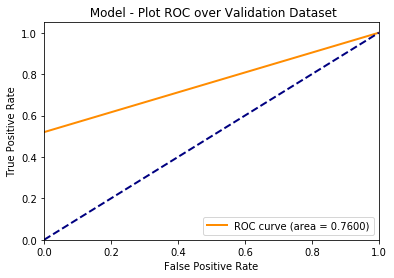

In [278]:
model_evaluation(y_test,y_predict, plot=True)

In [279]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_Predict_Proba, pos_label=1)
ROC_score = metrics.auc(fpr, tpr)
print('ROC Score is: ', ROC_score)

ROC Score is:  0.745523809524


In [280]:
list(zip(x_test.columns, clf.feature_importances_))

[('age', 0.059884879552438507),
 ('ip_address', 0.079573820065777068),
 ('time_diffrence', 0.26811703557066913),
 ('signup_time_wd', 0.0543024153620425),
 ('purchase_time_wd', 0.053155582828361102),
 ('signup_time_wy', 0.1100627277887604),
 ('purchase_time_wy', 0.19020622564927353),
 ('source_Ads', 0.01400959139828967),
 ('source_Direct', 0.0082129565510779112),
 ('source_SEO', 0.016967586179741763),
 ('browser_Chrome', 0.011113984519840194),
 ('browser_FireFox', 0.013150438853902765),
 ('browser_IE', 0.0051932241551257115),
 ('browser_Opera', 0.0066170273671367612),
 ('browser_Safari', 0.0083210284973284452),
 ('sex_F', 0.026475524807668922),
 ('sex_M', 0.011530433405628291),
 ('country_Algeria', 0.0),
 ('country_Argentina', 0.0),
 ('country_Australia', 5.809300240173412e-05),
 ('country_Austria', 6.0105184072126161e-05),
 ('country_Belgium', 0.0),
 ('country_Brazil', 0.0013754042738817257),
 ('country_Bulgaria', 0.0),
 ('country_Canada', 0.0081476764666729203),
 ('country_Chile', 0.0

In [281]:
np.mean(y_test['class'] == y_predict)

0.96470588235294119